# Convolutional Neural Network vs Fully Connected Neural Network for Image Recognition

Student no: 18821327<br>
School: University of Brighton, School of Computing, Engineering and Mathematics


I confirm that I have a Learning Support Plan for ‘spelling and grammar and extension’ as recommended by the Disability and Dyslexia Team, and agreed by the School. I understand that the deadline for my assessment has been adjusted (as per the required School protocol) and that this, and my spelling and grammar, should be taken into consideration when my assessment is marked/ graded.

### Table of Contents

* [Introduction](#intro)
* [Loss, optimiser and performance mertics](#loss)
* [What is a Deep Neural Network](#deep)
* [The dataset](#data)
    * [Visualising the dataset](#vdata)
    * [Preprocessing the dataset](#pdata)
* [What is a Convolutional Neural Network](#cnn)
    * [CNN architecture](#cnn_1)
    * [CNN training](#cnn_2)
    * [CNN training performance](#cnn_3)
    * [CNN refactoring](#cnn_4)
    * [CNN refactored performance](#cnn_5)
* [What is a Fully Connected Neural Network](#fcnn)
    * [FCNN architecture](#fcnn_1)
    * [FCNN training](#fcnn_2)
    * [FCNN training performance](#fcnn_3)
    * [FCNN refactoring](#fcnn_4)
    * [FCNN refactored performance](#fcnn_5)
* [Parameter tuning](#tune)
* [Testing](#test)
    * [Other works in literature](#test_1)
* [Conclusion](#conc)
* [Applications of CNNs in the real world](#app)
* [References](#ref)

### Introduction <a class='anchor' id='intro'></a>

'One of the most challenging multi-classes classification problems is fashion classification in which labels that characterize the clothes type are assigned to the images. The difficulty of this multi-classes fashion classification problem is due to the richness of the clothes properties and the high depth of clothes categorization as well. This complicated depth makes different labels/classes to have similar features.' (Kayed, Anter and Mohamed, 2020) Because of this I have chosen to use the fashion mnist dataset to compare the accuracy, precision and loss of 2 deep neural networks (DNNs), a convolutional neural network (CNN) and a fully connected neural network (FCNN). For which, the best performing model of the two will have their accuracy compared against that of other models in literature which were also tested on the fashion mnist dataset.

For humans image recognition is a trivial task, 'this is because our brains have been trained unconsiously with the same set of images that has resulted in the development of capabilities to differentiate between things effortlessly.' (Gupta 2018) However, a 'computer views visuals as an array of numerical values and looks for patterns in the digital image ... to recognise and distinguish key features of the image.' (Gupta, 2018)

Image recognition algorithms can be seen in everywhere in our lives today. In smartphones, government and banking apps they all employ a type of image recognition software. For example; most smartphones now employ facial recognition software, for verify your id on government sites you are able to scan your id/passport with your phone, and for banks you are able scan cheques from your home to deposit into your account. Because of this we need algorithms that are able to perform with a high degree of accuracy and precision, otherwise you could get locked out your phone, your id verification could fail or you could recieve the wrong amount of money but not at the fault of the user.

In recent years the field of computer vision has grown massively due to the demand for autonomous and semi-autonomous vehicles and drones. In this field lies a sub-field called image recognition, here CNNs have become the standard DNN for solving these types of problems. This is because in CNNs 'feature extraction is figure out by itself and these models tend to perform well with huge amount of samples.' (Greeshma and Sreekumar, 2019) 

### Loss, optimiser and performance mertics <a class='anchor' id='loss'></a>

The loss function tells the optimizer if it is changing the weights and biases in the correct direction, for example after the optimizer changes the weights and biases and recieves a higher loss the optimizer is moving in the wrong direction. Categorical Crossentropy is the chosen loss function. Categorical Crossentropy tells you the difference between 2 probability distributions.

The optimiser is used to update the weights and biases of the nodes in the network based on the value of the loss function and the learning rate. 'Adam, an adaptive learning rate method, will compute individual adaptive learning rates for each parameter based on the average of the mean (first moment) and the average of the uncentered variance (second moment). Each of these averages (moments) will have a decay rate controlled by parameters, beta 1, beta 2, respectively applied to them during the training phase.' (Brownlee, 2021) 

Categorical accuracy and precision are the chosen performance metrics. Accuracy is used to described how the model performs across all classes. It is calculated as the ratio between the number of correct predictions to the total number of predictions. Precision tells us how accurate the model is at predicting a sample as positive. It is calculated as the ratio between the number of positive samples correctly classififed to the total number of sampled classified as positive.

### What is a Deep Neural Network <a anchor='anchor' id='deep'></a>

Let's start with what is a neural network, 'artificial neural networks (ANNs) are comprised of node layers, containing an input layer, one or more hidden layers, and an output layer. Each node, or artificial neuron, connects to another and has an associated weight and threshold. If the output of any individual node is above the specified threshold value, that node is activated, sending data to the next layer of the network.' (IBM Cloud Education, 2020)

A deep neural network, is a neural network that consist of 2 or more hidden layers. A hidden layer is any layer between the input and output layer. They are considered hidden layers because they are not directly obserable from the input and output layers. 

#### Imports

In [2]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import Input, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy, Precision
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
import time

#### Load training and testing data

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### The dataset <a class='anchor' id='data'></a>
The fashion mnist dataset contains a total of 70000 samples: 60000 training and 10000 testing samples. Each sample contains 784 features and 1 label, where the features are a value from 0 to 255 detailing the lightness of a pixel, with the value closest to 0 showing a black pixel and the value closest to 255 a white pixel. The 10 labels are:

* 0 - T-shirt/top
* 1 - Trousers
* 2 - Pullover
* 3 - Dress
* 4 - Coat
* 5 - Sandal
* 6 - Shirt
* 7 - Sneaker
* 8 - Bag
* 9 - Ankle boot

In the training samples there are 6000 of each fashion clothing item and 1000 of each in the testing samples.

#### Visualising the dataset <a class='anchor' id='vdata'></a>

In [4]:
NUM_CLASSES = 10
data = {    
    'Training Samples': x_train.shape[0],
    'Testing Samples': x_test.shape[0],
    'Features': x_train.shape[1] * x_train.shape[2],
    'Labels': NUM_CLASSES
}
df = pd.DataFrame(data, index=['Amount'])
df

,Training Samples,Testing Samples,Features,Labels
Amount,60000,10000,784,10


In [5]:
# Find the amount of times each value occurs in the dataset
image_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
y_explore = (y_train, y_test)
frequencies = []
for _ in np.arange(2):
    (unique, counts) = np.unique(y_explore[_], return_counts=True)
    frequencies.append(np.asarray((unique, counts)).T[:, 1])

# Display in a dataframe
indexs = ['Training', 'Testing']
df = pd.DataFrame(frequencies, index=indexs, columns=image_names)
df

,T-shirt/top,Trousers,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
Training,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
Testing,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


In [6]:
found = [x for x in range(10)]
label_values = []
for i in range(24):
    label = y_train[i]
    values = x_train[i]
    if label in found:
        label_values.append((label, values))
        found.remove(label)

# sort items based on value of label
label_values.sort(key=lambda label: label[0])

Below you can see 1 example from each of the 10 label sets.

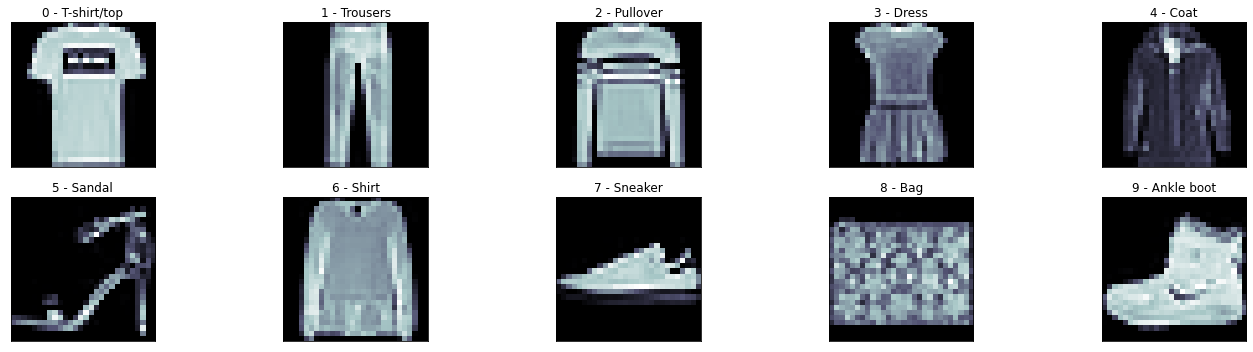

In [7]:
fig = plt.figure(figsize=(20, 5), tight_layout=True)
for idx in np.arange(10):
    ax = fig.add_subplot(2, 5, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(label_values[idx][1]), cmap='bone')
    ax.set_title(f'{label_values[idx][0]} - {image_names[idx]}')

#### Preprocessing the dataset <a class='anchor' id='pdata'></a>
At the moment, the data is not ready to be fed to the networks.

The x data, also known as the features, needs to be converted from its 0 - 255 scale to 0 - 1 scale. This is done by converting the integer numbers to decimal numbers and then dividing each number in the x data by 255.0. Since the each row of the x data is currently in a 28 x 28 2 dimensional array, the dimensions need to be expanded so that they have a depth of 1, this causes the values to be reshaped into 1 dimensional array, so they can be fed as input to the networks.

The y data, also known as the labels, needs to have its values converted from integers representing the item, into binary numbers representing the item. For example, before conversion each value in the y data set would contain one integer representing the item, 1 for Trousers, after conversion each value contains an array of binary numbers, the index of the 1 in the array points to the item that the feature values correspond to, [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] for Trousers. This is done so that later on the network can asign a probability to each index in the array, where the probability closest to 1 indicates the networks prediction.

In [8]:
print('-------Before processing-------')
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}\n\n')


print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}\n\n')

x_train = x_train.astype('float32') / 255.0
x_train = np.expand_dims(x_train, -1)

x_test = x_test.astype('float32') / 255.0
x_test = np.expand_dims(x_test, -1)

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)


print('-------After processing-------')
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}\n\n')


print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

-------Before processing-------
x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)


y_train shape: (60000,)
y_test shape: (10000,)


-------After processing-------
x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


y_train shape: (60000, 10)
y_test shape: (10000, 10)


In [9]:
# model parameters
INPUT_SHAPE = (28, 28, 1)
KERNEL_SIZE = (5, 5)
POOL_SIZE = (2, 2)
PADDING = 'same'
CONV_UNITS = 32
FULLY_UNITS = 64
ACTIV = ['relu', 'softmax']
DROPOUT = 0.3

# training parameters
BATCH_SIZE = 300
EPOCHS = 15
LOSS = CategoricalCrossentropy()
OPTIMIZER = Adam(learning_rate=1e-3)
EARLYSTOPPING = EarlyStopping(monitor='val_loss', mode='min', patience=4)
METRICS = [CategoricalAccuracy(), Precision()]

### What is a Convolutional Neural Network <a class='anchor' id='cnn'></a>

Simply put, a convolutional neural network is a deep learning algorithm which can take in an input image, assign learnable weights and biases to various aspects in the image and be able to differentiate one from the other. However, to expand upon this, I found the following explanation of how the CNN solves image recogntion problems:

'The inputs of CNN are not fed with the complete numerical values of the image. Instead the complete image is divided into a number of small sets with each set itself acting as an image. A small size of filter divides the complete image into small sections. Each set of neurons is connected to a small section of the image. These images are then treated similar to the regular neural network process. The computer collects patterns with respect to the image and the results are saved in the matrix format. This process repeats until the complete image in bits size is shared with the system. The result is a large matrix, representing different patterns the system has captured from the input image. This matrix is again downsampled (reduced in size) with a method known as max pooling. It extracts the maximum values from each sub matrix and results in a matrix of much smaller size. These values are representative of the pattern in the image. This matrix formed is supplied to the neural networks as the input and the output determines the probability of the classes in an image.' (Gupta, 2018)

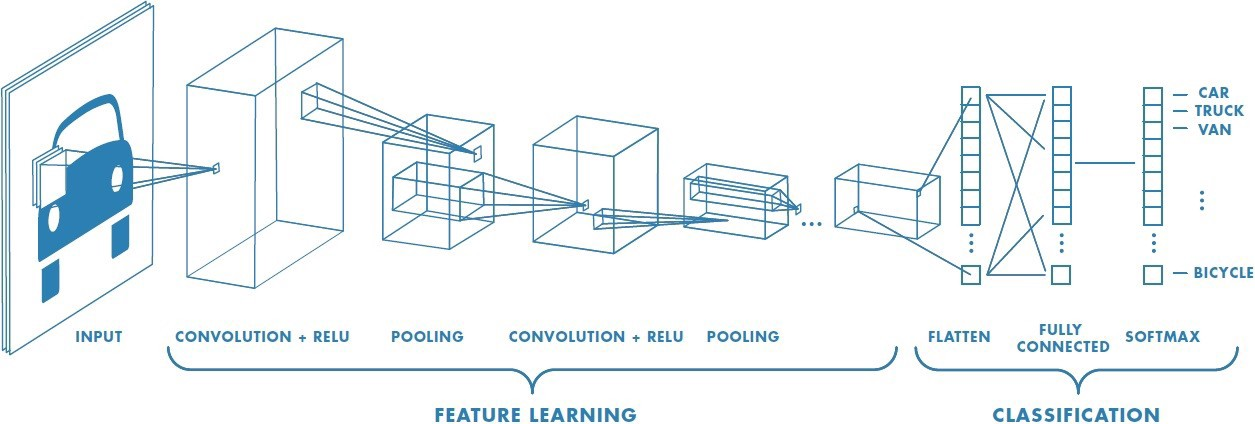
(Saha, 2018)

#### CNN architecture <a class='anchor' id='cnn_1'></a>

Below creates CNN models with different architectures. Where after each model is trained the next model has another Convolutional and MaxPool layer pair added after the first once there are 3 pairs another fully connected layer is added. With the first architecture having 1 Convolutional and MaxPool layer pair and 1 Fully Connected layer. The last having 3 Convolutional and MaxPool layer pairs and 2 Fully Connected layers. This was done so that I could find the optimal architecture for my simple CNN model.

Each layer in a network has an activation function where an activation function take as input the previous stage's output and apply a mathematical function to that input, in the case of 'relu' if the input is less than 0 it is changed to 0 and any number equal to or greater than 0 is left unchanged, for 'softmax' the values are scaled down to probabilies, where the value closest to 1 presents the chosen output.

The Convolutional and Fully connected layers both use the 'relu' activation function. The output layer has the 'softmax' activation function.

In [10]:
def cnn_arch(n, m):
    model = Sequential()
    # input layer
    model.add(Input(INPUT_SHAPE))
    # convolutional & pooling layers
    for _ in np.arange(n):
        model.add(Conv2D(CONV_UNITS, kernel_size=KERNEL_SIZE, activation=ACTIV[0], padding=PADDING))
        model.add(MaxPool2D(pool_size=POOL_SIZE))
    # flatten layer
    model.add(Flatten())
    # fully connected layers
    for _ in np.arange(m):
        model.add(Dense(FULLY_UNITS, activation=ACTIV[0]))
    # output layer
    model.add(Dense(NUM_CLASSES, activation=ACTIV[1]))
    return model

#### CNN training <a class='anchor' id='cnn_2'></a>
Here each model is compiled with a loss function, an optimser and performance metris. Then the models are fitted with the training data, where they are trained over 15 epochs.

For each epoch the training data is split (80/20) at differnt places in the data for each epoch. The model is trained on the 80% and then validated on the 20%. When the model is training the following performance metrics are being recored; 'Categorical Crossentropy', 'Categorical Accuracy' and 'Precision'.  

When the model is training on the 80% the model is fed inputs and the values are passed through the nodes of the network to the output layer where the model predicts an output. Now the loss function, categorical accuray and precision are calculated using the predicted output and back propagation is used to tune weights of the nodes in the network. After which, the model, with its tuned weights is validated on the 20% to see how it will perform on unseen data later on during the testing phase.

Early stopping is used during the training phase to stop training a model based upon the parameters passed in. The parameters I will pass in, will be used to detect when the models val_loss has stopped decreases with a patience of 3. Meaning after 3 epochs of the val_loss increasing the model will stop being trained. This is a method of preventing overfitting, because it stops the models training early when it realises the model is not generalising well.

In [11]:
def training(arch, name):
    historys = []
    count = 1
    if name == 'cnn':
        conv = 1
        hidd = 1
        while hidd < 3:
            model = arch(conv, hidd)
            model.summary()
            model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
            history = model.fit(x_train, y_train, BATCH_SIZE, EPOCHS, validation_split=0.2, callbacks=[EARLYSTOPPING])
            historys.append(history)
            model.save(f'{name}/{name}.{count}')
            count += 1
            conv += 1
            if conv == 4:
                hidd += 1
                conv = 1
    else:
        while count < 5:
            model = arch(count)
            model.summary()
            model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
            history = model.fit(x_train, y_train, BATCH_SIZE, EPOCHS, validation_split=0.2, callbacks=[EARLYSTOPPING])
            historys.append(history)
            model.save(f'{name}/{name}.{count}')
            count += 1
    
    return count-1, historys

In [13]:
%%capture
cnn_count, cnn_history = training(cnn_arch, 'cnn')

INFO:tensorflow:Assets written to: cnn/cnn.1/assets
INFO:tensorflow:Assets written to: cnn/cnn.2/assets
INFO:tensorflow:Assets written to: cnn/cnn.3/assets
INFO:tensorflow:Assets written to: cnn/cnn.4/assets
INFO:tensorflow:Assets written to: cnn/cnn.5/assets
INFO:tensorflow:Assets written to: cnn/cnn.6/assets


#### CNN training performance <a class='anchor' id='cnn_3'></a>
Now the training performances can be visualised

In [14]:
def visualise(count, historys):
    fig, axs = plt.subplots(count, 3, figsize=(20, 18), constrained_layout=True)

    metrics = [('categorical_accuracy', 'val_categorical_accuracy'), ('precision', 'val_precision'), ('loss', 'val_loss')]
    titles = ['Accuracy', 'Precision', 'Loss']

    for idx, ax in enumerate(axs):
        for i in range(3):
            ax[i].plot(historys[idx].history[metrics[i][0]], label='train', linestyle='dashed', color='red')
            ax[i].plot(historys[idx].history[metrics[i][1]], label='validation', color='blue')
            ax[i].set_title((f'{idx} {titles[i]}'))
            ax[i].set_ylabel(titles[i])
            ax[i].set_xlabel('Epochs')
            ax[i].set_xticks([x for x in np.arange(15)])
            ax[i].legend()
            ax[i].grid()
            

From these graphs, we a trying to find a model that has a validation accuracy or precision moving above the train accuracy or precision or a validation loss moving below the train loss. The reason for this is because it implies that the model is either able to or learning how to generalise well instead of learning the training data.

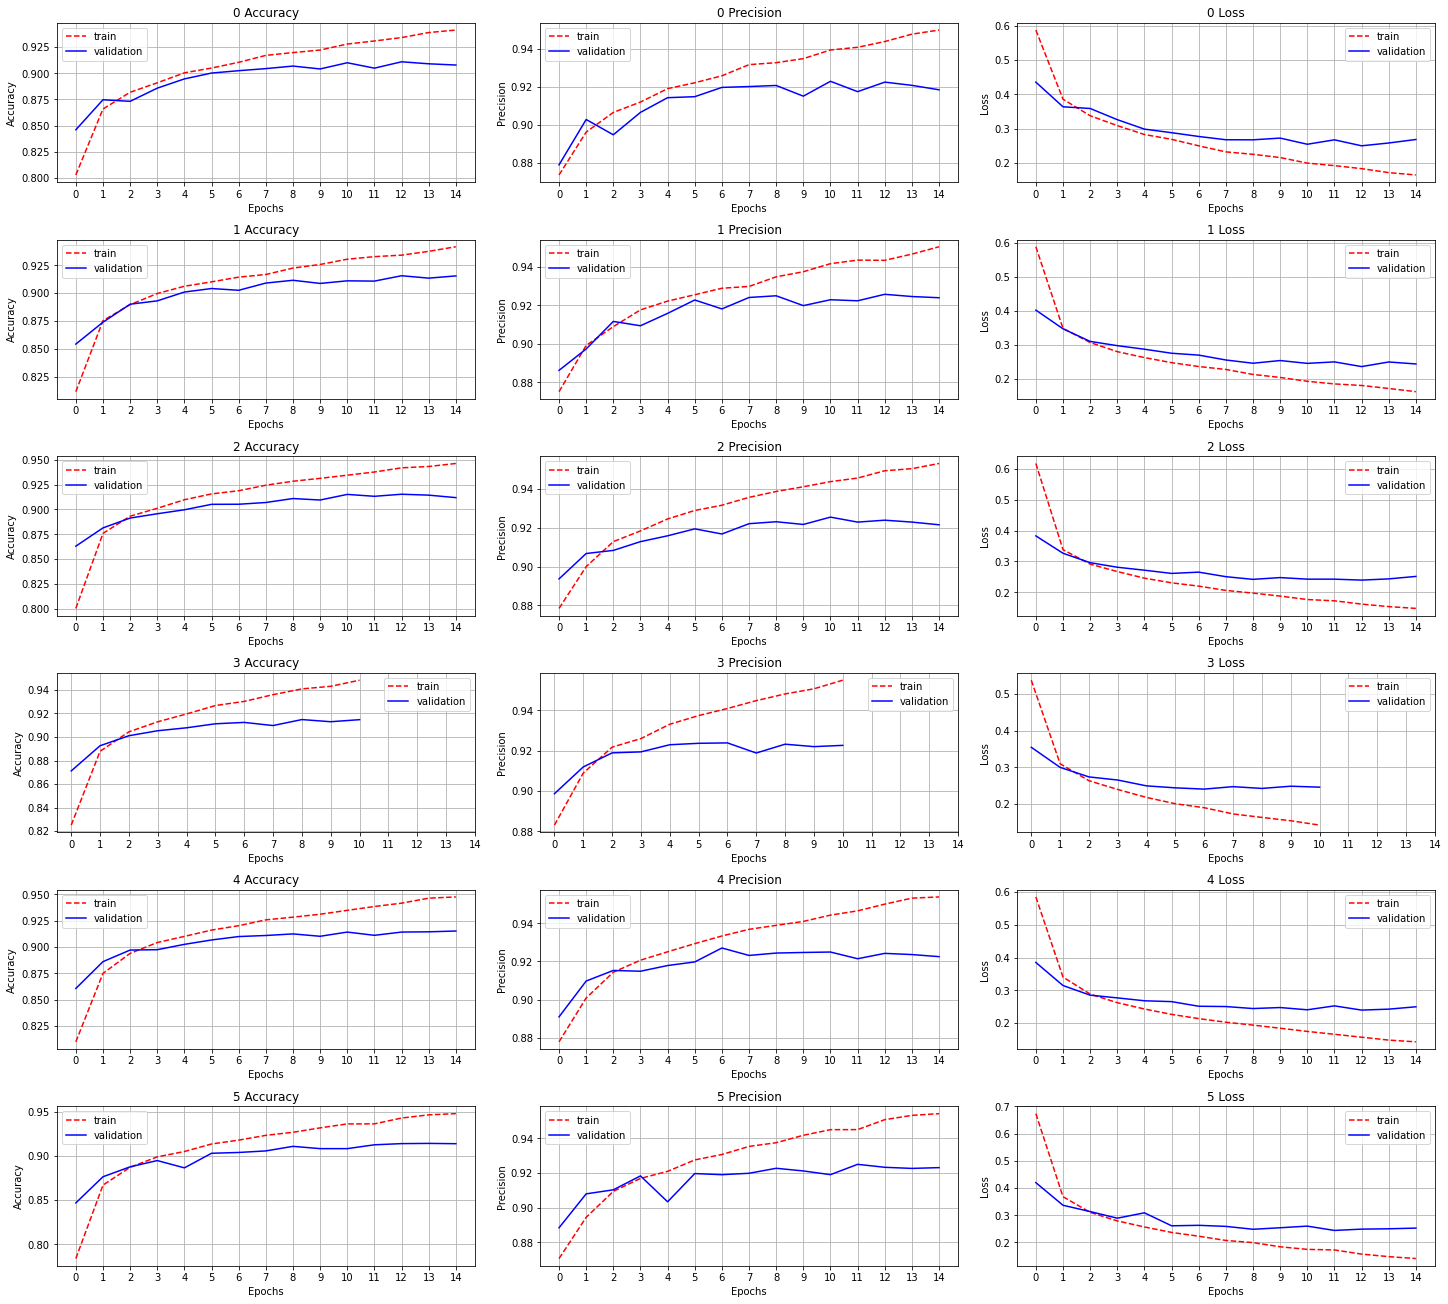

In [15]:
visualise(cnn_count, cnn_history)

##### CNN refactoring <a class='anchor' id='cnn_4'></a>
The CNN architecture I chose to improve was the CNN.N1 model, this was because this model outperformed all of the other models over a longer period of time making it the most consistent throughout the training and validation stages of the training phase.

From looking at the graphs above we can see that each of models testing 'Categorical Accuracy' and 'Precision' are scoring lower than the training 'Categorical Accuracy' and 'Precision' and the 'Loss' is also higher when the model is testing. From this we can tell that the model is overfitting. Overfitting is where the model familiarises itself with the training set and is subsequently unable to generalise well. This is caused by noise in the training data that the network picks up during training and learns it as an underlying concept of the data. To counter this people employ a regularisation technique.

Regularisation can be defined in this context as a set of different techniques that lower the complexity of a neural network model during training. There are 3 main regularisation techniques to employ, l1 regularisation, l2 regularisation and dropout. Where l1 regularisation forces the weight parameters to become 0, and l2 regularisation forces the weight parameters towards 0 (but never 0).

I have chosen to use a Dropout layer to counter the overfitting. In a Dropout layer, you are able to select a percentage of the number of neurons in the model you want to lose during training. For example, I will be applying a dropout rate of 0.3, this means that during training 30% of the neurons in the network will randomly have their weights set to 0, meaning they will be lost from the network. The loss of neurons to dropout is done at each forward propagation and weight update step.

Below is a function that places a Dropout layer in a certain position based upon the number provided as place. This was done to find the optimal location to place the Dropout layer. This could be refactored to have as many place holders as you want active Dropout layers.

In [16]:
def dropcnn(place):
    model = Sequential()
    # input layer
    model.add(Input(shape=INPUT_SHAPE))
    # 3 convolution & pooling layers
    model.add(Conv2D(CONV_UNITS, kernel_size=KERNEL_SIZE, activation=ACTIV[0], padding=PADDING))
    model.add(MaxPool2D(pool_size=POOL_SIZE))
    if place == 1:
        model.add(Dropout(DROPOUT))
    model.add(Conv2D(CONV_UNITS, kernel_size=KERNEL_SIZE, activation=ACTIV[0], padding=PADDING))
    model.add(MaxPool2D(pool_size=POOL_SIZE))
    if place == 2:
        model.add(Dropout(DROPOUT))
    # flatten to 1 dimension
    model.add(Flatten())
    if place == 3:
        model.add(Dropout(DROPOUT))
    # fully connected layer
    model.add(Dense(FULLY_UNITS, activation=ACTIV[0]))
    if place == 4:
        model.add(Dropout(DROPOUT))
    # output layer
    model.add(Dense(NUM_CLASSES, activation=ACTIV[1]))
    return model

In [17]:
%%capture
dropcnn_count, dropcnn_history = training(dropcnn, 'dropcnn')

INFO:tensorflow:Assets written to: dropcnn/dropcnn.1/assets
INFO:tensorflow:Assets written to: dropcnn/dropcnn.2/assets
INFO:tensorflow:Assets written to: dropcnn/dropcnn.3/assets
INFO:tensorflow:Assets written to: dropcnn/dropcnn.4/assets


#### CNN refactored performance <a class='anchor' id='cnn_5'></a>
Now that the models have less nodes in their network, in theory they should be able generalise better. However these examples below are still not the optimal model. The architecture that recieved the best scores will be put forward to have the parameters of the model tuned, for the best performance. After which, the model will be tested and have its scored compared to that of the FCNN model.

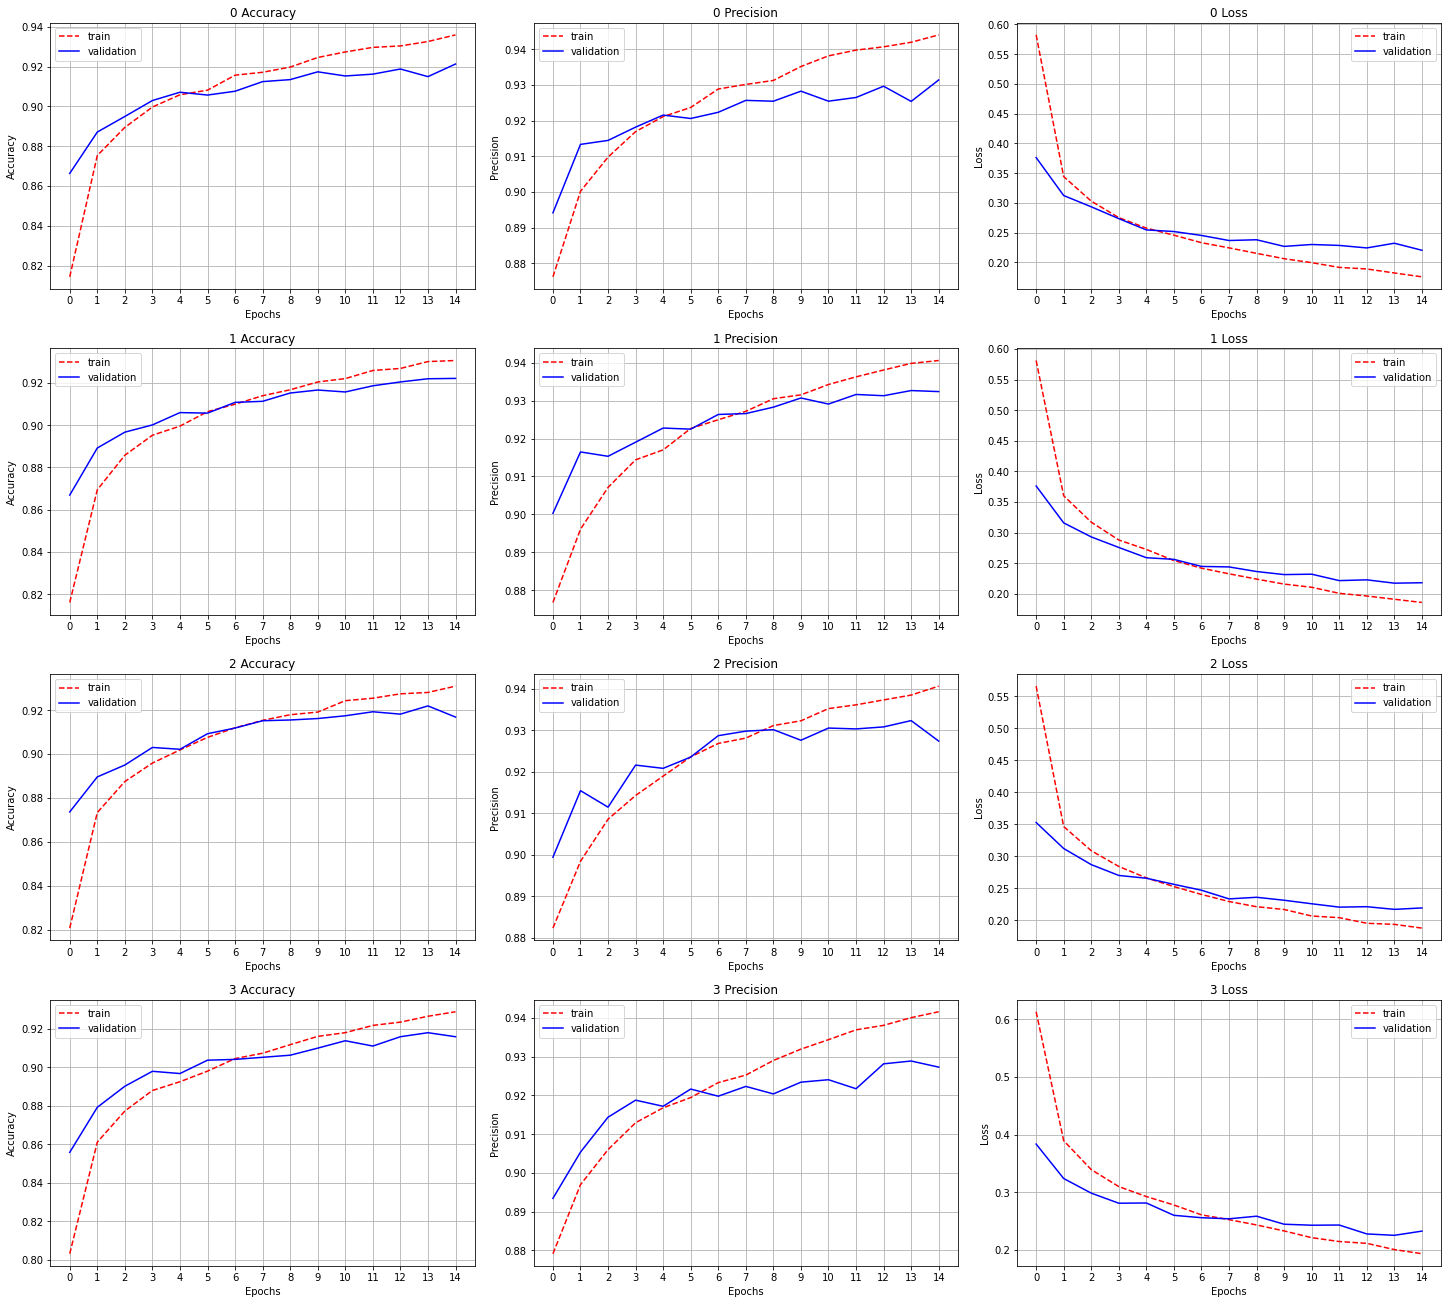

In [18]:
visualise(dropcnn_count, dropcnn_history)

### What is a Fully Connected Neural Network <a class='anchor' id='fcnn'></a>

'Fully connected neural networks (FCNNs) are a type of artificial neural network where the architecture is such that all the nodes or neurones, in one layer are connected to the neurones in the next layer.' (Moore, 2019)


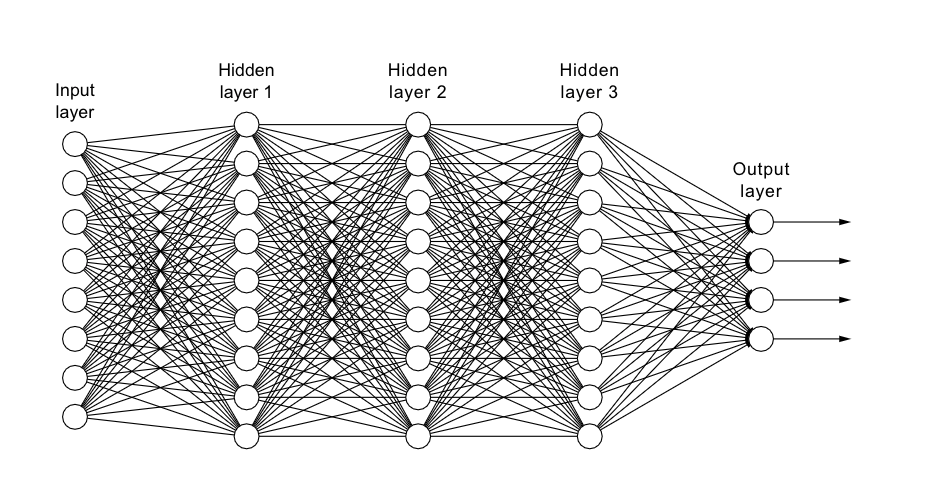
(Dürr, Stick and Murina, 2020)

#### FCNN architecture <a class='anchor' id='fcnn_1'></a>

The below function creates different FCNN models, where there is another fully connected layer added after the flatten layer each time a model has been trained. Until the model has 4 fully connected layers after the flatten layer.

In [19]:
def fcnn_arch(n):
    model = Sequential()
    model.add(Input(INPUT_SHAPE))
    model.add(Dense(FULLY_UNITS, activation=ACTIV[0]))
    model.add(Flatten())
    for _ in np.arange(n):
        model.add(Dense(FULLY_UNITS, activation=ACTIV[0]))
    model.add(Dense(NUM_CLASSES, activation=ACTIV[1]))
    return model

#### FCNN training <a class='anchor' id='fcnn_2'></a>

Here the above function is used to create 4 different FCNN models and each of these models are trained on the training data. The purpose of this is to find the optimal number of fully connected layers to add after the flatten layer.

In [20]:
%%capture
fcnn_count, fcnn_history = training(fcnn_arch, 'fcnn')

INFO:tensorflow:Assets written to: fcnn/fcnn.1/assets
INFO:tensorflow:Assets written to: fcnn/fcnn.2/assets
INFO:tensorflow:Assets written to: fcnn/fcnn.3/assets
INFO:tensorflow:Assets written to: fcnn/fcnn.4/assets


#### FCNN training performance <a class='anchor' id='fcnn_3'></a>

The below graphs show that without a regularisation step the model overfits massively on the training data. With it rarely scoring higher for accuracy and precision or lower for the loss on the validation phase. 

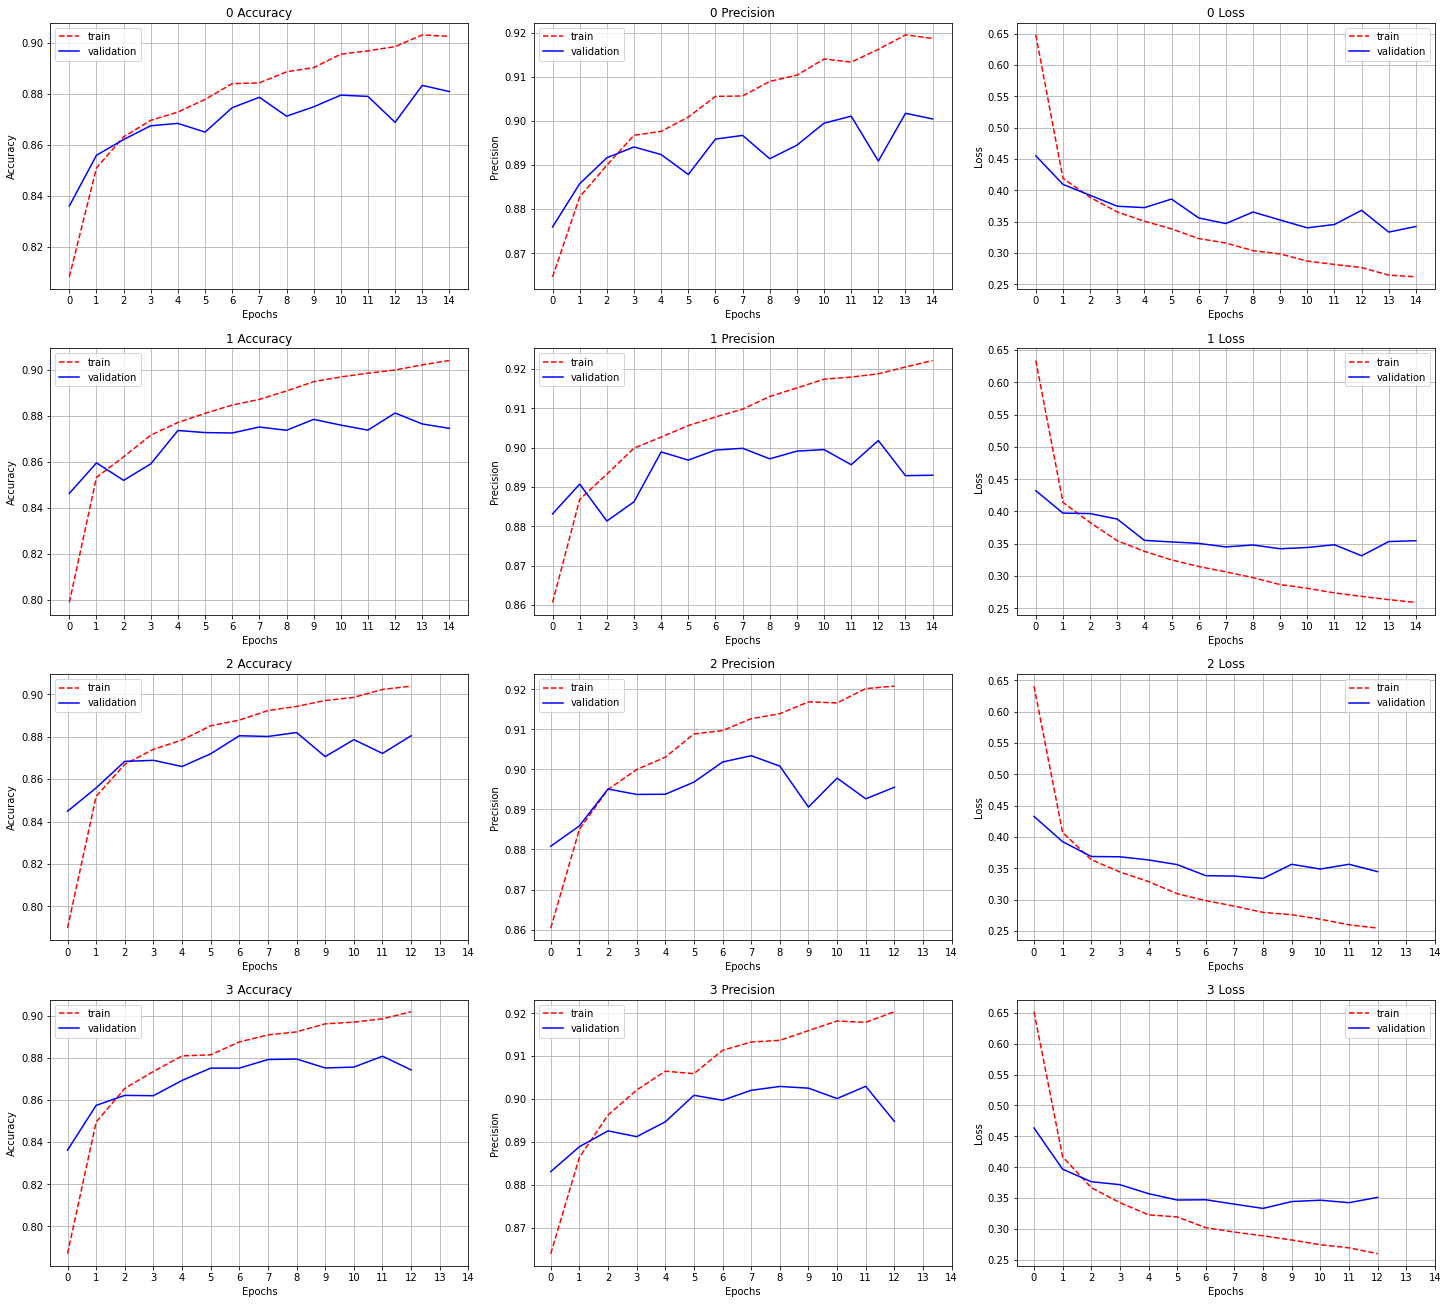

In [21]:
visualise(fcnn_count, fcnn_history)

#### FCNN refactoring <a class='anchor' id='fcnn_4'></a>

As seen with the CNN model, the FCNN model is overfitting on the training data. To try and counter this, I am going to employ the same dropout technique as decribed in [CNN refactoring](#cnn_4).

In [22]:
def dropfcnn(place):
    model = Sequential()
    model.add(Input(INPUT_SHAPE))
    model.add(Dense(FULLY_UNITS, activation=ACTIV[0]))
    model.add(Flatten())
    if place == 1:
        model.add(Dropout(DROPOUT))
    model.add(Dense(FULLY_UNITS, activation=ACTIV[0]))
    if place == 2:
        model.add(Dropout(DROPOUT))
    model.add(Dense(FULLY_UNITS, activation=ACTIV[0]))
    if place == 3:
        model.add(Dropout(DROPOUT))
    model.add(Dense(FULLY_UNITS, activation=ACTIV[0]))
    if place == 4:
        model.add(Dropout(DROPOUT))
    model.add(Dense(NUM_CLASSES, activation=ACTIV[1]))
    return model

In [23]:
%%capture
dropfcnn_count, dropfcnn_history = training(dropfcnn, 'dropfcnn')

INFO:tensorflow:Assets written to: dropfcnn/dropfcnn.1/assets
INFO:tensorflow:Assets written to: dropfcnn/dropfcnn.2/assets
INFO:tensorflow:Assets written to: dropfcnn/dropfcnn.3/assets
INFO:tensorflow:Assets written to: dropfcnn/dropfcnn.4/assets


#### FCNN refactored performance <a class='anchor' id='fcnn_5'></a>

As you can see from the below graphs, once the model has the dropout layer applied it is able to score higher for accuracy and precision on the validation stage consistently through out each of the models, whilst also keeping a low loss rating.

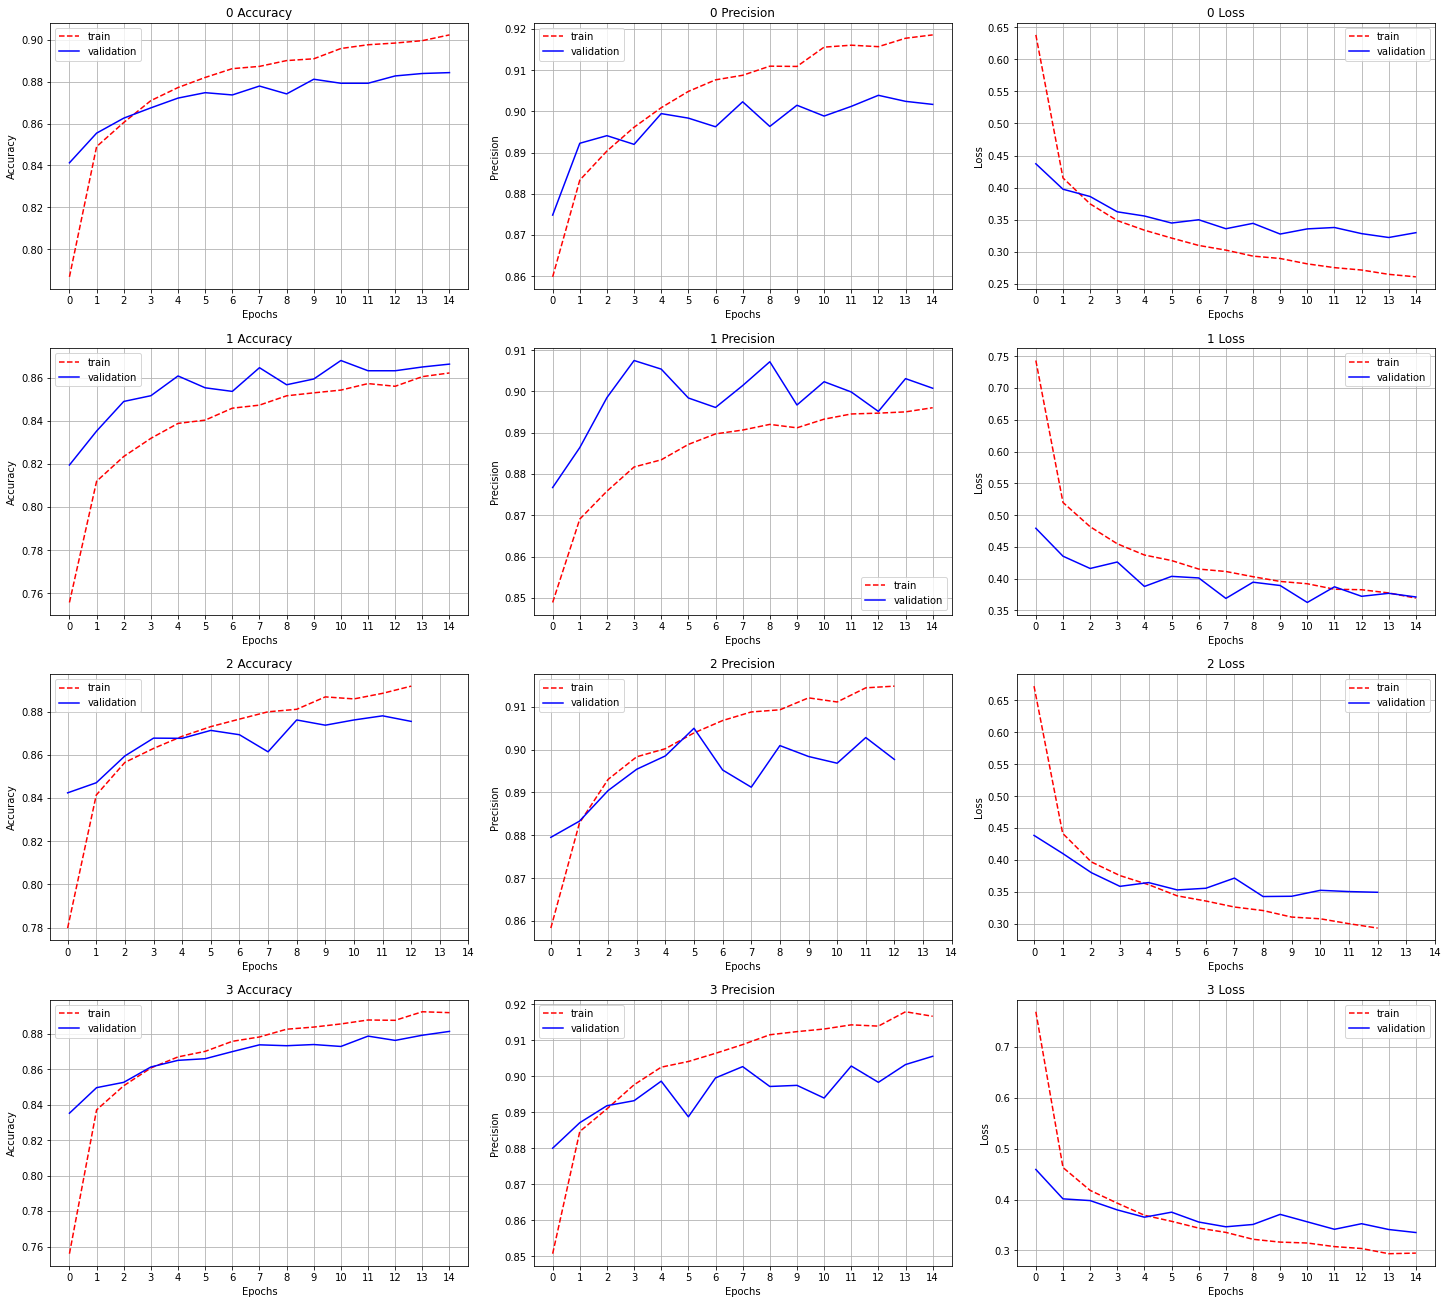

In [24]:
visualise(dropfcnn_count, dropfcnn_history)

### Parameter tuning <a class='anchor' id='tune'></a>

When creating a machine learning model it is near impossible to find the perfect parameters without using a parameter tuning method. These work by you defining a grid of parameters with an array of values. The tuner then uses 1 parameter from each array in the grid and applies it to the appropriate parameter in your model. The model is then trained using those selected parameters. Whilst the tuner is training the model it is either trying to maximize or minimize an objective function. The result of this objective function leads the tuner in the way of the best hyperparameters for the model. 

Here the following parameters are being tuned for the CNN model; number of filters in the convolutional layers, number of units in the fully connected layer, the rate of dropout in the dropout layer and finally the learning rate for the adam optimiser. For the FCNN model the parameters tuned are; number of units in the fully connected layers, the rate of dropout in the dropout layer and the learning rate for the adam optimiser.

The parametertuning.py script has been made seperate from this notebook, because the total run time of it exceeds 17 hours.

After finding the optimal parameters by runing the parametertuning.py script, the models need to be created and have those parameters added in the correct places.

In [28]:
cnndf = pd.read_csv('results/cnn.csv')
# CNN parameters
cnn_filters1 = int(cnndf['first'].values)
cnn_filters2 = int(cnndf['second'].values)
cnn_units = int(cnndf['connected'].values)
cnn_dropout = float(cnndf['dropout'].values)
cnn_learning_rate = float(cnndf['learning_rate'].values)
cnn_optimizer = Adam(cnn_learning_rate)
cnndf

,Unnamed: 0,first,second,connected,dropout,learning_rate
0,parameters,256,256,256,0.5,0.001


In [29]:
cnn = Sequential()
cnn.add(Input(INPUT_SHAPE))
cnn.add(Conv2D(cnn_filters1, kernel_size=KERNEL_SIZE ,activation=ACTIV[0], padding=PADDING))
cnn.add(MaxPool2D(POOL_SIZE))
cnn.add(Conv2D(cnn_filters2, kernel_size=KERNEL_SIZE ,activation=ACTIV[0], padding=PADDING))
cnn.add(MaxPool2D(POOL_SIZE))
cnn.add(Dropout(cnn_dropout))
cnn.add(Flatten())
cnn.add(Dense(cnn_units, activation=ACTIV[0]))
cnn.add(Dense(NUM_CLASSES, activation=ACTIV[1]))
cnn.compile(loss=LOSS, optimizer=cnn_optimizer, metrics=METRICS)
cnn.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 256)       6656      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 256)       1638656   
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 7, 7, 256)         0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 7, 7, 256)         0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 12544)             0         
_________________________________________________________________
dense_61 (Dense)             (None, 256)             

In [30]:
fcnndf = pd.read_csv('results/fcnn.csv')
# FCNN parameters
fcnn_units1 = int(fcnndf['first'].values)
fcnn_units2 = int(fcnndf['second'].values)
fcnn_units3 = int(fcnndf['third'].values)
fcnn_units4 = int(fcnndf['fourth'].values)
fcnn_dropout = float(fcnndf['dropout'].values)
fcnn_learning_rate = float(fcnndf['learning_rate'].values)
fcnn_optimizer = Adam(fcnn_learning_rate)
fcnndf

,Unnamed: 0,first,second,third,fourth,dropout,learning_rate
0,parameters,32,256,256,256,0.6,0.0001


In [31]:
fcnn = Sequential()
fcnn.add(Input(INPUT_SHAPE))
fcnn.add(Dense(fcnn_units1, activation=ACTIV[0]))
fcnn.add(Flatten())
fcnn.add(Dense(fcnn_units2, activation=ACTIV[0]))
fcnn.add(Dense(fcnn_units3, activation=ACTIV[0]))
fcnn.add(Dense(fcnn_units4, activation=ACTIV[0]))
fcnn.add(Dropout(fcnn_dropout))
fcnn.add(Dense(NUM_CLASSES, activation=ACTIV[1]))
fcnn.compile(loss=LOSS, optimizer=fcnn_optimizer, metrics=METRICS)

Once the parameters have been added to the models, the models need to be trained on the training data before they can be evaluated

In [32]:
%%capture
cnn_history = cnn.fit(x_train, y_train, BATCH_SIZE, EPOCHS, validation_split=0.2, callbacks=[EARLYSTOPPING])

In [33]:
%%capture
fcnn_history = fcnn.fit(x_train, y_train, BATCH_SIZE, EPOCHS, validation_split=0.2, callbacks=[EARLYSTOPPING])

Now their training performances can be compared

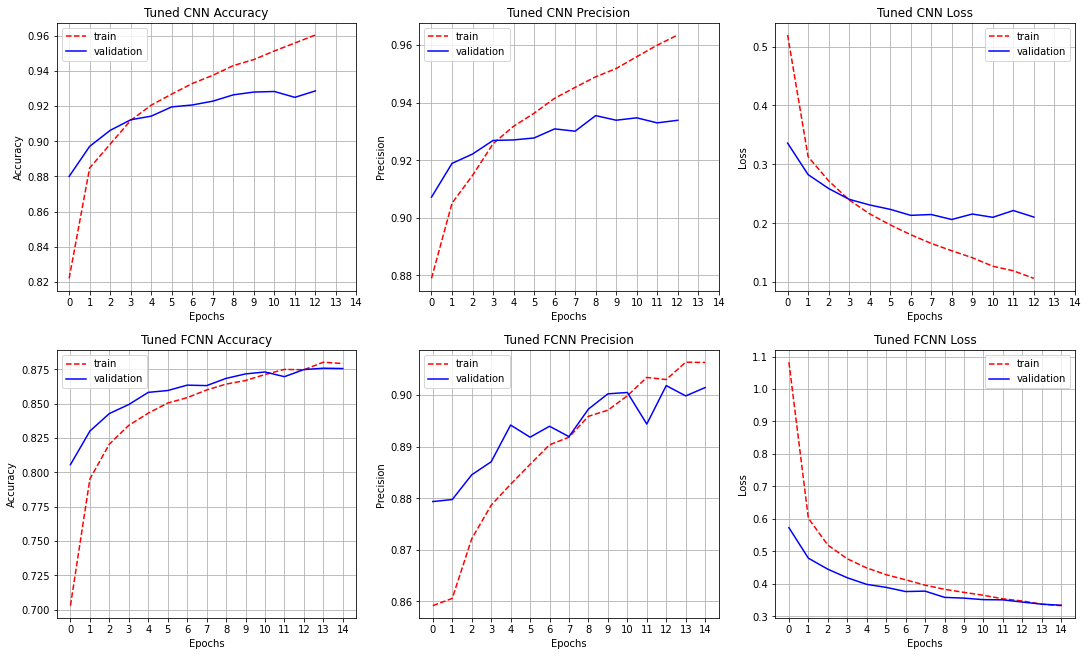

In [34]:
historys = [cnn_history, fcnn_history]
names = ['Tuned CNN', 'Tuned FCNN']
fig, axs = plt.subplots(2, 3, figsize=(15, 9), constrained_layout=True)

metrics = [('categorical_accuracy', 'val_categorical_accuracy'), ('precision', 'val_precision'), ('loss', 'val_loss')]
titles = ['Accuracy', 'Precision', 'Loss']

for idx, ax in enumerate(axs):
    for i in range(3):
        ax[i].plot(historys[idx].history[metrics[i][0]], label='train', linestyle='dashed', color='red')
        ax[i].plot(historys[idx].history[metrics[i][1]], label='validation', color='blue')
        ax[i].set_title((f'{names[idx]} {titles[i]}'))
        ax[i].set_ylabel(titles[i])
        ax[i].set_xlabel('Epochs')
        ax[i].set_xticks([x for x in np.arange(15)])
        ax[i].legend()
        ax[i].grid()

### Testing <a class='anchor' id='test'></a>

Now that the models have been trainined with their optimal hyperparameters, we can move onto evaluating the models performance on previously unseen data (Testing samples).

In [35]:
model_scores = []
models = [cnn, fcnn]
for i in np.arange(len(models)):
    scores = models[i].evaluate(x_test, y_test)
    model_scores.append(scores)

313/313 [==============================] - 2s 5ms/step - loss: 0.3589 - categorical_accuracy: 0.8709 - precision: 0.8949


In [36]:
df = pd.DataFrame(model_scores, index=['CNN', 'FCNN'], columns=['Loss', 'Accuracy', 'Precision'])
df.style.format('{:.4f}').highlight_min('Loss', color='lightgreen').highlight_max(['Accuracy', 'Precision'], color='lightgreen')

,Loss,Accuracy,Precision
CNN,0.2321,0.9244,0.9308
FCNN,0.3589,0.8709,0.8949


#### Other works in literature <a class='anchor' id='test_1'></a>

The following table and graph compares the test accuracy of my models against others that I have found in literature. (Xiao, Rasul and Vollgraf, 2017) - SVC, (Bhatnagar, Ghosal and Kolekar, 2017) - CNN2, BATCH, SKIP, (Agarap, 2017) - CNNSO, CNNSV, (Dufourq and Bassett, 2017) - EDEN, (Greeshma and Sreekumar, 2019) - HPO

In [37]:
compared_scores = [[model_scores[0][1], model_scores[1][1], 0.8970, 0.9060, 0.9117, 0.9222, 0.9254, 0.9186, 0.9072, 0.9399]]
names = ['CNN', 'FCNN', 'SVC', 'EDEN', 'CNN2', 'BATCH', 'SKIP', 'CNNSO', 'CNNSV', 'HPO']

compared_df = pd.DataFrame(compared_scores, columns=names, index=['Accuracy'])
compared_df.sort_values(by='Accuracy', axis=1, inplace=True)
compared_df.style.format('{:.4f}')

,FCNN,SVC,EDEN,CNNSV,CNN2,CNNSO,BATCH,CNN,SKIP,HPO
Accuracy,0.8709,0.8970,0.9060,0.9072,0.9117,0.9186,0.9222,0.9244,0.9254,0.9399


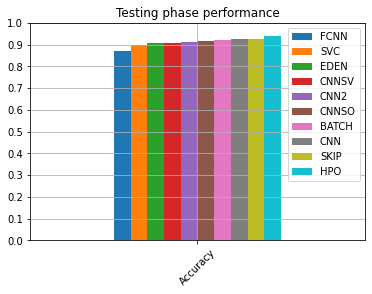

In [41]:
compared_df.plot.bar()
plt.xticks(rotation=45)
plt.title('Testing phase performance')
plt.yticks([x for x in np.arange(0.0, 1.1, 0.1)])
plt.grid()

### Conclusion <a class='anchor' id='conc'></a>

The CNN model was able to achieve much better scores for accuracy and loss than the FCNN model and only a slight increase in the precision. However the final model, even with the tuned parameters was still overfitting on the training data. This is something that needs to be addressed prior to employing the model into real world scenarios.

Now if you compare the accuracy of my models to the other models in literature, you can see that the CNN model fairs very well against the other CNN models that have applied either different techniques for countering overfitting, different parameters, different architectures and finally different types of data preprocessing steps. On the other hand, the FCNN model is lacking behind the pack. 

With this being said the training time my final CNN model took per epoch was on average around 380 seconds whereas the final FCNN model took around 12 seconds per epoch. So even though the CNN model is able to outperform the FCNN model on the performance metrics of accuracy and precision, the computational cost of performing convolutions is too great to not apply a mechanism to reduce the time taken to train the model. As presented in (Greeshma and Sreekumar, 2019) paper.

### Applications of CNNs in the real world <a class='anchor' id='app'></a>

1. 'Object detection: With CNN, we now have sophisticated models like R-CNN, Fast R-CNN and Faster R-CNN that are the predominant pipline for many object detction models deployed in autonomous vehicles, facial detection, and more.' (Mishra, 2020)
2. 'Semantic segmentation: In 2015, a group of researchers from Hong Kong developed a CNN-based Deep Parsing Network to incorporate rich information into an image sementation model. researches from UC Berkeley alo built fully convolutional networks taht improved upon state-of-the-art semantic segmentation.' (Mishra, 2020)
3. 'Image captioning: CNNs are used with recurrent neural networks to write captions for images and videos. This can be used for many applications such as activity recognition or describing videos and images for the visually impaired. It has been heavily deployed by YouTube to make sense to the huge number of vidoes uploaded to the platform on a regulard basis.' (Mishra, 2020)

### References <a class='anchor' id='ref'></a>

Agarap, A.F.M (2017). An Architecture Combining Convolutional Neural Network (CNN) and Support Vector Machine (SVM) for Image Classification. [online] Available at: https://arxiv.org/pdf/1712.03541.pdf [Accessed 6 Dec. 2021].<br>


Bhatnagar, S., Ghosal, D. and Kolekar, M.H. (2017). Classification of Fashion Article Images Using Convolutional Neural Networks. [online] Ieeexplore. Available at: https://ieeexplore.ieee.org/abstract/document/8313740 [Accessed 15 Jan. 2022].<br>

Brownlee, J. (2021). Code Adam Optimization Algorithm From Scratch. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/adam-optimization-from-scratch/ [Accessed 15 Dec. 2021].<br>

Dufourq, E. and Bassett, B.A. (2017). EDEN: Evolutionary deep networks for efficient machine learning. [online] IEEE Xplore. Available at: https://ieeexplore.ieee.org/abstract/document/8261132 [Accessed 7 Jan. 2022].<br>

Dürr, O., Stick, B. and Murina, E. (2020). Chapter 2: Neural network architectures · Probabilistic Deep Learning: With Python, Keras and TensorFlow Probability. [online] livebook.manning.com. Available at: https://livebook.manning.com/book/probabilistic-deep-learning-with-python/chapter-2/v-5/10 [Accessed 17 Jan. 2022].<br>

Greeshma, K.V. and Sreekumar, K. (2019). Hyperparameter Optimization and Regularization on Fashion-MNIST Classification. [online] Research Gate. Available at: https://www.researchgate.net/profile/Greeshma-K-V/publication/334947180_Hyperparameter_Optimization_and_Regularization_on_Fashion-MNIST_Classification/links/5d45c99a4585153e593ae361/Hyperparameter-Optimization-and-Regularization-on-Fashion-MNIST-Classification.pdf [Accessed 12 Dec. 2021].<br>

Gupta, S. (2018). Understanding Image Recognition and Its Uses. [online] Einfochips. Available at: https://www.einfochips.com/blog/understanding-image-recognition-and-its-uses [Accessed 1 Dec. 2021].<br>

IBM Cloud Education (2020). What are Neural Networks? [online] www.ibm.com. Available at: https://www.ibm.com/uk-en/cloud/learn/neural-networks [Accessed 20 Dec. 2021].<br>

Kayed, M., Anter, A. and Mohamed, H. (2020). Classification of Garments from Fashion MNIST Dataset Using CNN LeNet-5 Architecture. [online] IEEE Xplore. Available at: https://ieeexplore.ieee.org/document/9047776 [Accessed 7 Dec. 2021].<br>

Mishra, M. (2020). Convolutional Neural Networks, Explained. [online] Medium. Available at: https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939 [Accessed 19 Jan. 2022].<br>

Moore, C.M. (2019). Fully Connected Neural Network | Radiology Reference Article | Radiopaedia.org. [online] Radiopaedia. Available at: https://radiopaedia.org/articles/fully-connected-neural-network [Accessed 2 Jan. 2022].<br>

Saha, S. (2018). A Comprehensive Guide to Convolutional Neural Networks — the ELI5 way. [online] Towards Data Science. Available at: https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53 [Accessed 30 Dec. 2021].<br>

Xiao, H., Rasul, K. and Vollgraf, R. (2017). Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms. [online] Available at: https://arxiv.org/pdf/1708.07747.pdf [Accessed 5 Dec. 2021].<br>